# GAUSSSIAN NAIVE BAYES CLASSIFICATION FOR PREDICTION DRY BEAN

Dry Beans atau kacang kering, adalah biji dari tanaman dalam keluarga Fabaceae yang dipanen setelah matang dan dikeringkan sebelum dimakan. Kacang kering adalah salah satu sumber utama protein nabati yang sangat penting untuk memenuhi kebutuhan gizi manusia. Kacang kering tidak hanya menyediakan energi yang dibutuhkan tubuh, tetapi juga kaya akan serat, vitamin, protein, dan mineral yang esensial. Ada berbagai jenis kacang kering dengan karakteristik unik yang membedakannya satu sama lain. Penelitian ini bertujuan untuk mengklasifikasikan jenis-jenis kacang kering berdasarkan identifikasi, pengelompokan, dan pemahaman yang diperoleh dari studi tersebut. Klasifikasi ini membantu peneliti memahami karakteristik khusus dari setiap jenis kacang kering, sehingga penggunaan mereka dalam kehidupan sehari-hari dapat lebih dioptimalkan

## TUJUAN

Tujuan dari tugas kali ini adalah untuk mengevaluasi model mana yang lebih efektif dalam mengklasifikasikan tujuh jenis kacang kering yang berbeda. Ketujuh macam tersebut diantaranya yaitu Seker,
 Dermosan, Barbunya, Horoz, Bombay, Sira, dan Cali. 

Dengan begitu tugas ini diharapkan dapat memberikan wawasan dasar bagi petani, peneliti, dan produsen makanan dalam mengenali, mengelola, dan memanfaatkan berbagai jenis kacang kering secara lebih efisien. Selain itu, pemahaman yang lebih baik tentang klasifikasi kacang kering juga dapat membantu mengidentifikasi aspek-aspek seperti kualitas nutrisi, rasa, tekstur, dan nilai ekonomis kacang kering, yang pada akhirnya dapat memperluas pasar dan meningkatkan keuntungan.

In [1]:
pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import joblib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
# from google.colab import files

# DATA UNDERSTANDING

Data Understanding adalah tahap dalam proses analisis data yang bertujuan untuk memahami karakteristik, kualitas, dan struktur dari data yang akan digunakan. Pada bagian ini kita akan memahami data yang kita gunakan yaitu Dataset Dry Bean.

## MENGUMPULKAN DATA

### Mencari Data

Tahapan pertama dalam melakukan understanding data adalah mencari data yang akan digunakan. Data yang kita gunakan adalah Dataset Dry Bean yang bersumber dari :

http://archive.ics.uci.edu/dataset/602/dry+bean+dataset

### Menarik Data

Setelah mendapatkan data maka kita akan mengupload data ke notebook yang kita gunakan. 

In [3]:
df = pd.read_excel('Notebook1/Dry_Bean_Dataset.xlsx')

df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## MEMAHAMI DATA

### Deskripsi Data

<img src="Notebook1/Img/dry_bean.jpg" width="" align="" />

Dry Bean atau Kacang kering adalah biji tanaman dari keluarga fabaceae yang dipanen setelah matang dan dikeringkan sebelum dikonsumsi. Kacang kering merupakan sumber protein nabati yang tinggi dan penting untuk kebutuhan gizi manusia. Kacang ini menyediakan energi bagi tubuh karena kaya akan serat, vitamin, protein, dan mineral. Ada berbagai jenis kacang kering, masing-masing dengan karakteristik dan manfaat yang berbeda-beda.

Berikut penjelasan dari ketujuh jenis dry bean yang digunakan pada Dataset kita:

- Seker adalah jenis kacang putih kecil dengan bentuk bulat. Kacang ini biasanya digunakan dalam masakan yang memerlukan waktu memasak singkat karena kulitnya yang tipis dan teksturnya yang lembut setelah dimasak. Seker sering ditemukan dalam sup atau salad sederhana, memberikan sentuhan halus pada hidangan.

- Dermosan memiliki ukuran sedang dengan warna yang bisa bervariasi dari putih hingga abu-abu. Kacang ini lebih besar dan lebih keras dibandingkan Seker, membutuhkan waktu memasak yang lebih lama. Dermosan sangat cocok untuk hidangan yang dimasak secara perlahan seperti kacang oven atau semur, di mana teksturnya yang lebih padat dapat bertahan dalam proses memasak yang panjang.

- Barbunya juga dikenal sebagai kacang cranberry atau borlotti, dikenal dengan kulitnya yang bercorak merah dan putih. Kacang ini berukuran sedang hingga besar dan memiliki rasa yang kaya serta tekstur krim setelah dimasak. Barbunya sering digunakan dalam masakan Mediterania dan Timur Tengah seperti salad dan sup, di mana tampilannya yang menarik dan rasa yang lezat menjadi bintang utama.

- Horoz adalah kacang besar dengan warna kuning pucat hingga krem. Kacang ini memiliki tekstur padat dan sering kali memiliki rasa yang agak manis. Karena ukurannya yang besar dan teksturnya yang kokoh, Horoz sering digunakan dalam hidangan yang memerlukan waktu memasak lama, seperti kacang panggang atau stew.

- Bombay, juga dikenal sebagai kacang kuda atau kacang Lima, memiliki bentuk yang besar dan pipih. Ukurannya yang besar dan teksturnya yang lembut seperti mentega, serta rasa yang sedikit manis, membuatnya ideal untuk sup kental atau sebagai pengganti protein dalam berbagai hidangan. Kacang Bombay sering menjadi pilihan utama untuk masakan yang mengutamakan kelembutan dan rasa manis alami.

- Sira adalah jenis kacang yang kecil dan berwarna cokelat atau keabuan. Setelah dimasak, kacang ini memiliki tekstur yang lembut dan rasa yang netral, membuatnya serbaguna dalam berbagai hidangan. Sira biasanya digunakan dalam sup, salad, atau sebagai pelengkap dalam berbagai masakan, memberikan sentuhan lembut tanpa mengubah rasa utama hidangan.

- Cali dikenal karena ukurannya yang besar dan warna yang bervariasi, mulai dari putih hingga krem. Kacang ini memiliki kulit tebal dan tekstur yang kenyal, serta rasa yang sedikit kacang. Cali sering digunakan dalam hidangan yang memerlukan waktu memasak lama seperti kacang panggang atau stew, di mana tekstur dan rasanya dapat memberikan kekayaan dan kedalaman pada hidangan.

Pada dataset yang kita gunakan terdapat 13.611 data dan 16 fitur dengan 7 class dan tidak terdapat missing value pada tersebut. Pada semua fiturnya data menggunakan tipe data Numerical. 

### Penjelasan Fitur

1. Area (Luas) (A): Ini adalah luas zona kacang yang diukur dalam piksel. Luas menunjukkan jumlah piksel yang termasuk dalam batas-batas kacang.

2. Perimeter (Keliling) (P): Keliling kacang didefinisikan sebagai panjang batas kacang tersebut. Ini adalah jumlah panjang dari garis yang mengelilingi kacang.

3. Major Axis Length (Panjang Sumbu Utama) (L): Panjang sumbu utama adalah jarak antara ujung-ujung dari garis terpanjang yang bisa digambar di dalam kacang. Garis ini biasanya mencerminkan dimensi terbesar dari kacang.

4. Minor Axis Length (Panjang Sumbu Minor) (l): Ini adalah jarak antara ujung-ujung dari garis terpanjang yang bisa digambar di dalam kacang dengan kondisi garis tersebut tegak lurus terhadap sumbu utama. Sumbu ini biasanya mencerminkan dimensi terkecil dari kacang yang tegak lurus terhadap sumbu utama.

5. Aspect Ratio (Rasio Aspek) (K): Rasio aspek mendefinisikan hubungan antara panjang sumbu utama (L) dan panjang sumbu minor (l). Ini adalah ukuran dari bentuk kacang, apakah lebih lonjong atau mendekati bentuk bulat.

6. Eccentricity (Eksentrisitas) (Ec): Eksentrisitas mengukur bagaimana bentuk kacang berbeda dari sebuah lingkaran. Ini adalah eksentrisitas dari elips yang memiliki momen yang sama dengan daerah kacang tersebut.

7. Convex Area (Luas Konveks) (C): Ini adalah jumlah piksel dalam poligon konveks terkecil yang bisa menutupi area kacang. Poligon konveks adalah poligon di mana semua sudutnya kurang dari 180 derajat.

8. Equivalent Diameter (Diameter Ekivalen) (Ed): Diameter ekivalen adalah diameter lingkaran yang memiliki luas yang sama dengan luas kacang. Ini memberikan cara untuk membandingkan luas kacang dengan ukuran lingkaran yang setara.

9. Extent (Ekstensi) (Ex): Ekstensi adalah rasio antara jumlah piksel dalam kotak pembatas kacang dan luas kacang. Kotak pembatas adalah persegi panjang terkecil yang bisa menutupi seluruh area kacang.

10. Solidity (Kepaduan) (S): Kepaduan, juga dikenal sebagai konveksitas, adalah rasio antara jumlah piksel dalam cangkang konveks (poligon konveks terkecil yang dapat mencakup kacang) dan jumlah piksel dalam kacang itu sendiri. Ini mengukur seberapa padat atau kompak bentuk kacang tersebut. 

11. Roundness (Kebulatan) (R): Kebulatan dihitung dengan rumus (4piA)/(P^2) di mana A adalah luas dan P adalah keliling. Ini memberikan ukuran seberapa dekat bentuk kacang dengan bentuk lingkaran sempurna.

12. Compactness (Kekompakan) (CO): Kekompakan mengukur kebulatan dari suatu objek dengan rumus Ed/L di mana Ed adalah diameter ekivalen dan L adalah panjang sumbu utama. Ini memberikan indikasi seberapa kompak atau padat kacang itu dalam kaitannya dengan panjangnya.

13. ShapeFactor1 (Faktor Bentuk 1) (SF1): Ini adalah parameter yang digunakan untuk mengevaluasi bentuk kacang berdasarkan formula tertentu yang biasanya dikembangkan untuk mengukur karakteristik bentuk tertentu. Misalnya, SF1 dapat mencakup rasio luas terhadap keliling atau kombinasi lain dari parameter fisik.

14. ShapeFactor2 (Faktor Bentuk 2) (SF2): Sama seperti SF1, SF2 adalah parameter lain yang digunakan untuk mengevaluasi bentuk kacang. Setiap faktor bentuk ini memberikan perspektif tambahan tentang geometri dan proporsi kacang.

15. ShapeFactor3 (Faktor Bentuk 3) (SF3): SF3 adalah faktor tambahan yang memberikan informasi lebih lanjut tentang dimensi atau konfigurasi kacang. Ini membantu dalam pengklasifikasian bentuk berdasarkan karakteristik geometris.

16. ShapeFactor4 (Faktor Bentuk 4) (SF4): SF4 adalah faktor bentuk lainnya yang menganalisis karakteristik spesifik dari bentuk kacang. Faktor ini dapat mencakup berbagai kombinasi metrik bentuk yang unik untuk jenis analisis tertentu.

17. Class (Kelas): Ini adalah klasifikasi atau kategori kacang berdasarkan jenisnya. Dalam konteks ini, jenis-jenis kacang yang diklasifikasikan meliputi Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, dan Sira. Setiap jenis memiliki karakteristik unik yang membedakan satu dari yang lain.

## PLOTTING DATA

### Data Distribution

- Area feature

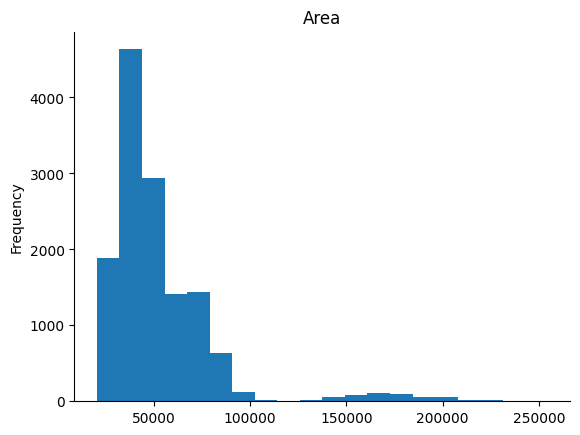

In [4]:
df['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Perimeter Feature

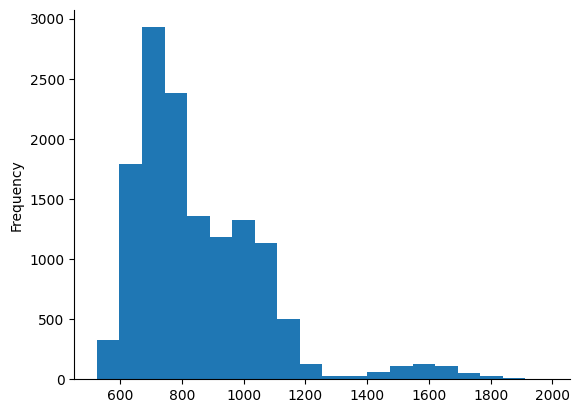

In [5]:
df['Perimeter'].plot(kind='hist', bins=20, title='')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Major Axis Lenght Feature

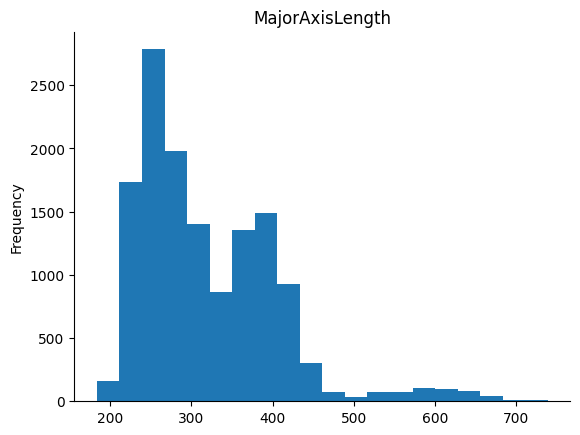

In [6]:
df['MajorAxisLength'].plot(kind='hist', bins=20, title='MajorAxisLength')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Minor Axis lenght Feature

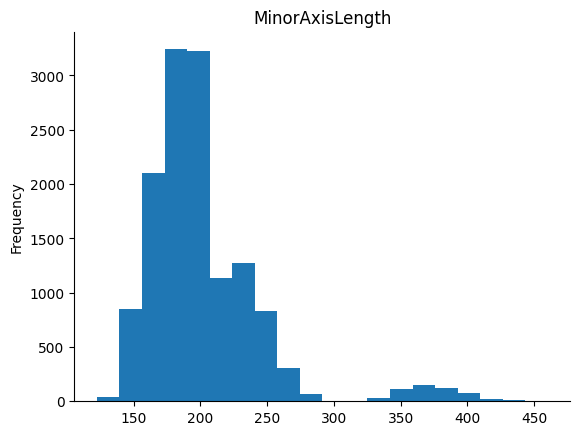

In [7]:
df['MinorAxisLength'].plot(kind='hist', bins=20, title='MinorAxisLength')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Aspect Ratio Feature

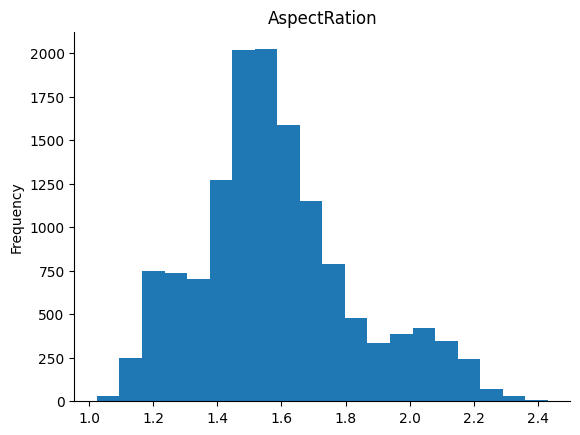

In [8]:
df['AspectRation'].plot(kind='hist', bins=20, title='AspectRation')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Eccentricity Feature

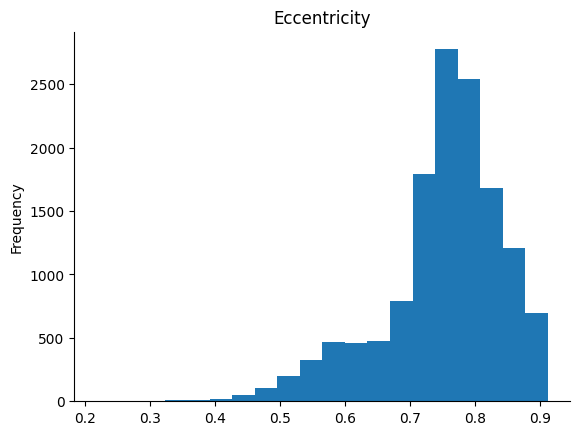

In [9]:
df['Eccentricity'].plot(kind='hist', bins=20, title='Eccentricity')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Convex Area Feature

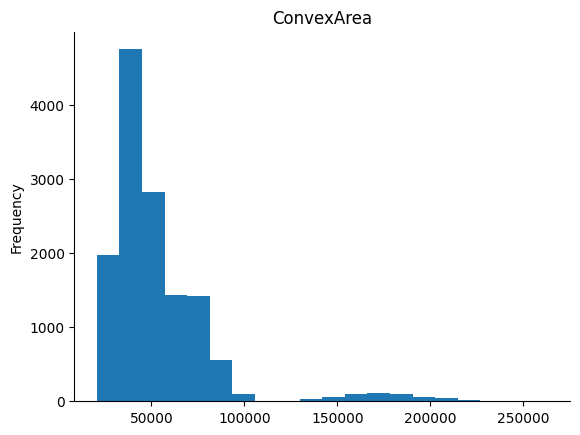

In [10]:
df['ConvexArea'].plot(kind='hist', bins=20, title='ConvexArea')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Equiv Diameter Feature

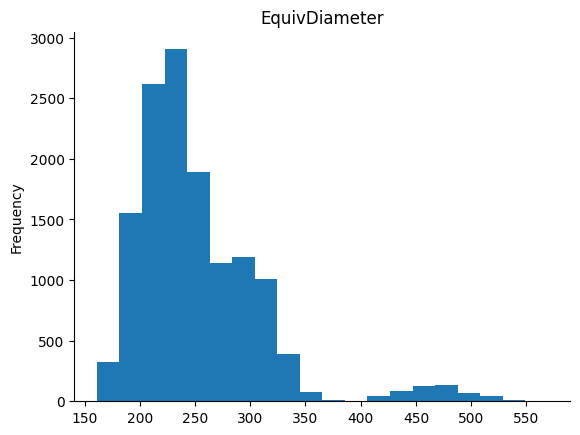

In [11]:
df['EquivDiameter'].plot(kind='hist', bins=20, title='EquivDiameter')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Extent Feature

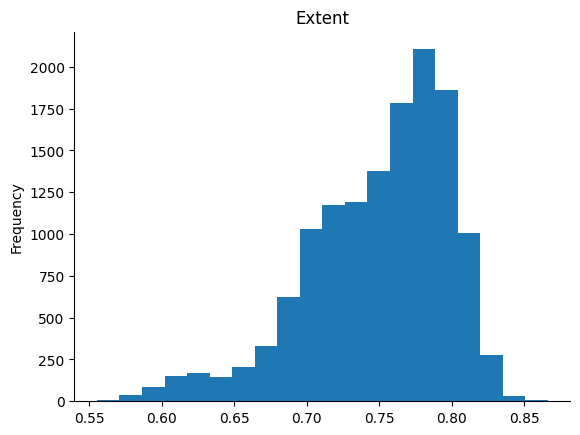

In [12]:
df['Extent'].plot(kind='hist', bins=20, title='Extent')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Solidity Feature

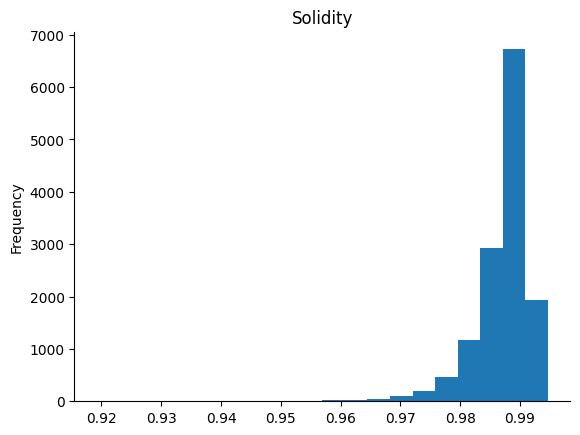

In [13]:
df['Solidity'].plot(kind='hist', bins=20, title='Solidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Roundness Feature

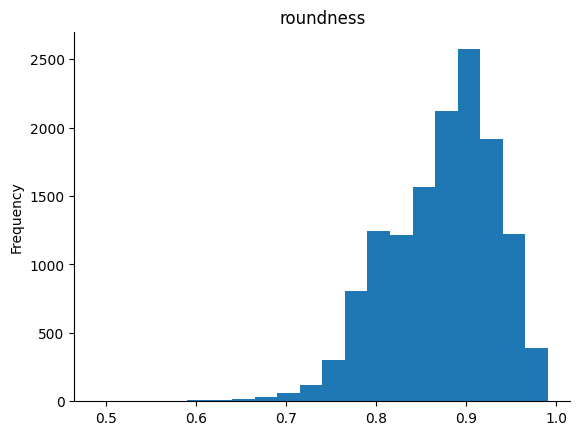

In [14]:
df['roundness'].plot(kind='hist', bins=20, title='roundness')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Compactness Feature

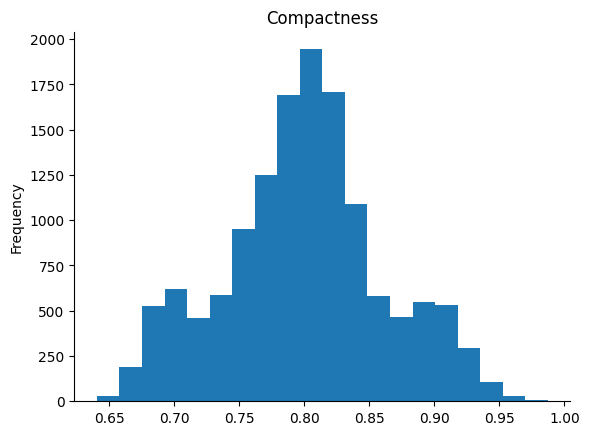

In [15]:
df['Compactness'].plot(kind='hist', bins=20, title='Compactness')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Shape Factor 1 Feature

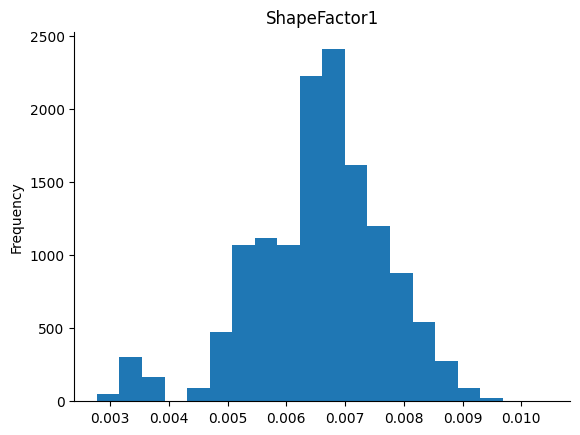

In [16]:
df['ShapeFactor1'].plot(kind='hist', bins=20, title='ShapeFactor1')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Shape Factor 2 Feature

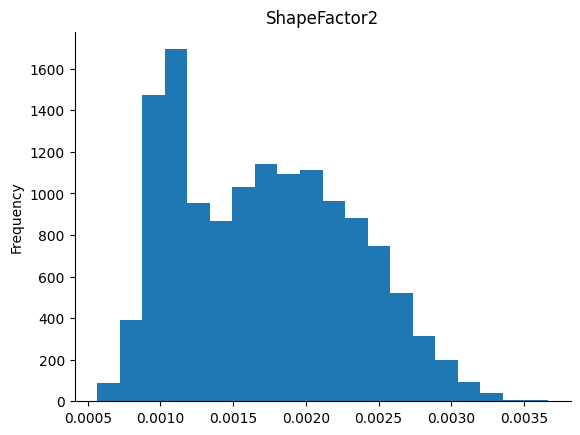

In [17]:
df['ShapeFactor2'].plot(kind='hist', bins=20, title='ShapeFactor2')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Shape Factor 3 Feature

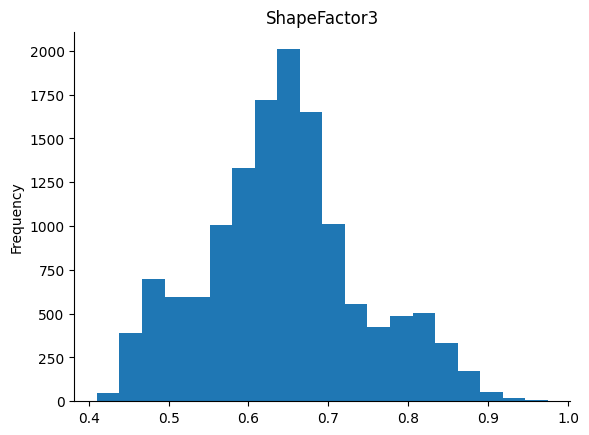

In [18]:
df['ShapeFactor3'].plot(kind='hist', bins=20, title='ShapeFactor3')
plt.gca().spines[['top', 'right',]].set_visible(False)

- Shape Factor 4 Feature

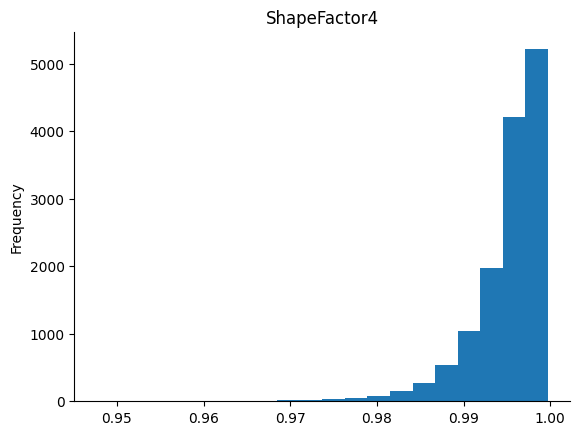

In [19]:
df['ShapeFactor4'].plot(kind='hist', bins=20, title='ShapeFactor4')
plt.gca().spines[['top', 'right',]].set_visible(False)

### 2D Distribution

xx

## EKSPLORASI DATA

In [20]:
df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','AspectRation', 'Eccentricity', 'ConvexArea','EquivDiameter', 'Extent','Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']].describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Pada kode diatas kita dapat melihat deskripsi data, seperti banyak data, rata-rata, standar deviasi, nilai minimal, nilai maximal, median data pada tiap-tiap fiturnya.

## KUALITAS DATA

### Missing Value

Missing value atau data yang hilang adalah kondisi ketika suatu data yang seharusnya ada dalam dataset tidak tersedia atau tidak terisi. Fenomena ini sering muncul dalam analisis data dan bisa disebabkan oleh berbagai alasan, seperti kesalahan manusia saat memasukkan data, keterbatasan alat pengukur, atau responden yang tidak menjawab pertanyaan tertentu dalam survei.

Pada dataset yang kita pakai kali ini tidak terdapat missing value. Untuk pengecekannya dapat dilihat pada kode berikut

In [21]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Dikarenakan tidak terdapat missing value pada dataset kali ini, maka tidak perlu adanya penghapusan ataupun penginputan untuk missing value.

### Outlier Data

Outlier adalah nilai yang jauh berbeda dari nilai lainnya dalam kumpulan data. Nilai ini muncul sebagai pengecualian dalam pola data yang ada. Nilai yang ada di outlier bisa jauh lebih tinggi maupun lebih rendah dibandingkan dengan nilai-nilai lain dalam dataset. Outlier bisa terjadi karena berbagai alasan, termasuk kesalahan pengukuran, kejadian langka, atau karena faktor lain yang tidak terduga.

Mendeteksi outlier merupakan langkah penting dalam analisis data karena outlier memiliki dampak signifikan terhadap hasil analisis dan berpotensi menghasilkan kesimpulan yang tidak akurat. 

berikut beberapa cara untuk mengatasi Outlier yang dapat dilakukan :
Menghapus outlier
Dalam beberapa situasi, penghapusan outlier merupakan pilihan paling tepat. Jika outlier merupakan hasil dari kesalahan input atau noise, penghapusan outlier akan meningkatkan akurasi analisis data. Namun, penting untuk berhati-hati saat menghapus outlier karena terkadang outlier justru bisa memberikan informasi penting.
Imputasi
Imputasi adalah proses penggantian nilai outlier dengan nilai lain. Nilai pengganti ini bisa berupa mean, median, atau modus dari kumpulan data. Namun harus digunakan dengan hati-hati karena bisa mengubah distribusi data.

# DATA PREPROCESSING

## LOCAL OUTLIER FACTOR

### Konsep Local Outlier Factor

Algoritme Local Outlier Factor (LOF) adalah metode deteksi anomali tanpa pengawasan yang menghitung deviasi kepadatan lokal dari titik data tertentu terhadap titik data tetangganya. Ini menganggap sampel yang memiliki kepadatan jauh lebih rendah daripada sampel tetangganya sebagai outlier.
LOF suatu titik didasarkan pada rasio kepadatan lokal daerah sekitar titik dan kepadatan lokal tetangganya. Ini mempertimbangkan kepadatan relatif titik data.
Dengan kata sederhana, LOF membandingkan kepadatan lokal suatu titik dengan kepadatan lokal k-tetangga terdekatnya dan memberikan skor sebagai hasil akhir.

## CHECK OUTLIER

In [22]:
# Mengurangi n_neighbors untuk LOF
lof = LocalOutlierFactor(n_neighbors=20, p=2)
lof_predict = lof.fit_predict(df.drop(['Class'], axis=1))
outlier = df.index[lof_predict == -1]

In [23]:
df.loc[outlier]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
22,31573,674.103,217.307026,185.448251,1.171793,0.521268,32197,200.499357,0.756965,0.980619,0.873119,0.922655,0.006883,0.003077,0.851292,0.997538,SEKER
107,33276,704.493,234.788138,180.705496,1.299286,0.638462,33857,205.835660,0.759657,0.982840,0.842534,0.876687,0.007056,0.002571,0.768580,0.998605,SEKER
136,33607,690.171,214.765297,199.524143,1.076388,0.369996,34162,206.856862,0.770803,0.983754,0.886597,0.963176,0.006390,0.003393,0.927709,0.998574,SEKER
214,34483,687.567,233.740724,188.587866,1.239426,0.590790,35051,209.535484,0.740678,0.983795,0.916611,0.896444,0.006778,0.002700,0.803612,0.996018,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13326,39127,768.735,268.896736,186.719676,1.440109,0.719597,39977,223.199560,0.790828,0.978738,0.832019,0.830057,0.006872,0.002012,0.688994,0.992227,DERMASON
13346,39303,746.675,275.468861,184.335498,1.494389,0.743109,40311,223.700992,0.746000,0.974994,0.885875,0.812074,0.007009,0.001880,0.659464,0.985495,DERMASON
13425,39949,763.431,264.160174,193.661698,1.364029,0.680097,40617,225.531919,0.757069,0.983554,0.861343,0.853770,0.006612,0.002167,0.728922,0.994271,DERMASON
13493,40690,760.969,290.702356,180.494583,1.610588,0.783897,41649,227.613965,0.672395,0.976974,0.883006,0.782979,0.007144,0.001656,0.613057,0.987382,DERMASON


In [24]:
# Membuang outlier
df_cleaned = df.drop(outlier).reset_index(drop=True)
x = df_cleaned.drop(['Class'], axis=1)
y = df_cleaned['Class']

In [25]:
df_cleaned

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
4,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13088,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13089,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13090,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13091,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [26]:
# Standarisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_joblib = scaler.fit(x)
x_scaled = scaler.transform(x)

joblib.dump(x_joblib, 'Notebook1/Stacking/scaler.joblib')

['Notebook1/Stacking/scaler.joblib']

# DATA MODELING

### Membagi Data (feature dan class)

Membagi data menjadi data train dan data test dilakukan untuk menguji kemampuan generalisasi model. Dengan memisahkan dataset, kita dapat melatih model pada data train dan menguji performanya pada data test. Selain itu, pembagian data memungkinkan kita untuk membandingkan dan memilih model terbaik secara objektif serta meningkatkan kehandalan evaluasi model. Dengan demikian, pembagian data adalah praktik penting untuk memastikan hasil model yang kredibel dan dapat diandalkan.

In [27]:
# Membagi data menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=5)

### Data Train

In [28]:
x_train

array([[ 0.19704964,  0.35015972,  0.05617144, ..., -0.00393874,
         0.66777138,  0.23783735],
       [-0.16302601, -0.1827685 , -0.25986771, ...,  0.18720911,
         0.50337474,  0.17343801],
       [-0.74399843, -0.88151849, -0.91639569, ...,  0.85037247,
         0.40013683, -1.59132838],
       ...,
       [ 0.50126322,  0.71673195,  0.71699412, ..., -0.83879696,
        -0.52562346, -2.94295619],
       [ 0.30346656,  0.6357489 ,  0.19257625, ..., -0.1572881 ,
         0.53044917, -2.20231517],
       [ 0.76567252,  1.49691095,  1.02328821, ..., -1.01816415,
        -0.6745321 ,  0.04274435]])

In [29]:
y_train

2152     BARBUNYA
9109         SIRA
11210    DERMASON
11743    DERMASON
9709     DERMASON
           ...   
3046     BARBUNYA
9917     DERMASON
4079         CALI
2254     BARBUNYA
2915     BARBUNYA
Name: Class, Length: 10474, dtype: object

### Data Test

In [30]:
x_test

array([[-0.6256062 , -0.86057244, -1.0213787 , ...,  1.76871457,
         1.7817728 ,  0.78850431],
       [-0.37997636, -0.36473764, -0.30326084, ..., -0.11471772,
        -0.26795287, -0.80145849],
       [ 0.0958379 ,  0.19816262,  0.26094031, ..., -0.54963414,
        -0.38047488,  0.32767314],
       ...,
       [-0.39164548, -0.3987233 , -0.19683286, ..., -0.37864566,
        -0.68866   ,  0.59811657],
       [-0.35857731, -0.49160784, -0.56365531, ...,  0.68088361,
         0.9177502 ,  0.8549021 ],
       [ 0.28591185,  0.54803468,  0.50411297, ..., -0.73483717,
        -0.52289924,  0.84621019]])

In [31]:
y_test

242         SEKER
7805         SIRA
3798         CALI
10159    DERMASON
3249     BARBUNYA
           ...   
6251        HOROZ
1504        SEKER
13052    DERMASON
1481        SEKER
2232     BARBUNYA
Name: Class, Length: 2619, dtype: object

## GAUSSIAN NAIVE BAYES CLASSIFICATION

Gaussian Naive Bayes merupakan teknik klasisifkasi yang digunakan dalam machine learning dengan menggunakan metode probability dan distribusi gaussian atau distribusi normal. Pada distribusi gaussian tiap fitur data memiliki pengaruh yang independent dalam meprediksi target. Prediksi akhir didapat dari kombinasi predikasi seluruh parameter dengan probability dari target yang diklasifikasikan kedalam dua kelas. Klasifikasi akhirnya adalah hasil probability yang lebih tinggi dari group target.

Tujuan metode ini adalah mengklasifikasikan probabilitas berdasarkan pembelajaran mesin atas probabilitas lain. 

In [32]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# data baru yang akan di klasifikasikan
data = [df_cleaned.values.tolist()[2][:-1]]
new_data_scaled = scaler.transform(data)

result = classifier.predict(new_data_scaled)
print(f'Data {data}')
print(f'Termasuk ke dalam Species: {result}')

# Evaluasi performa
score = classifier.score(x_test, y_test)
print("Akurasi model :", score)

Data [[29380, 624.11, 212.82612986020646, 175.93114261271373, 1.209712656324364, 0.5627273167504117, 29690, 193.41090409881002, 0.7781132475237036, 0.9895587739979791, 0.9478494730164112, 0.9087742385103313, 0.007243911840034257, 0.003047733217213173, 0.8258706165800325, 0.9990661373632715]]
Termasuk ke dalam Species: ['SEKER']
Akurasi model : 0.9022527682321497
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## K-NEAREST NEIGHBOOR

Algoritma K-Nearest Neighbor (KNN) adalah algoritma machine learning yang bersifat non-parametric dan lazy learning. Metode yang bersifat non-parametric memiliki makna bahwa metode tersebut tidak membuat asumsi apa pun tentang distribusi data yang mendasarinya. Dengan kata lain, tidak ada jumlah parameter atau estimasi parameter yang tetap dalam model, terlepas data tersebut berukuran kecil ataupun besar. Tujuan dari algoritma k-nearest neighbor adalah untuk mengidentifikasi tetangga terdekat dari titik kueri yang diberikan, sehingga kita dapat menetapkan label kelas ke titik tersebut.

In [33]:
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(x_train, y_train)

result = classifier.predict(x_test)

classifier.score(x_test, y_test)

0.9240168003054601

# ENSEMBLE LEARNING

Ensemble Learning dalam pembelajaran mesin menggabungkan beberapa model individual untuk menciptakan model prediktif yang lebih kuat dan akurat. Dengan memanfaatkan beragam kekuatan model yang berbeda, pembelajaran ansambel bertujuan untuk mengurangi kesalahan, meningkatkan kinerja, dan meningkatkan ketahanan prediksi secara keseluruhan, sehingga menghasilkan hasil yang lebih baik di berbagai tugas dalam pembelajaran mesin dan analisis data.

## STACKING CLASSIFIER

<img src="Notebook1/Img/stacking.png" width="" align="" />

### Make KNN model with n = 3

In [34]:
clf_n_3 = KNeighborsClassifier(n_neighbors=3)

clf_n_3.fit(x_train, y_train)

joblib.dump(clf_n_3, 'Notebook1/Stacking/knn_3.joblib')

result = clf_n_3.predict(x_train)

result_n_3 = pd.DataFrame(result, columns=['P1'])

result_n_3

,P1
0,BARBUNYA
1,SIRA
2,DERMASON
3,DERMASON
4,DERMASON
...,...
10469,BARBUNYA
10470,DERMASON
10471,CALI
10472,BARBUNYA


### Make KNN model with n = 5

In [35]:
clf_n_5 = KNeighborsClassifier(n_neighbors=5)

clf_n_5.fit(x_train, y_train)

joblib.dump(clf_n_5, 'Notebook1/Stacking/knn_5.joblib')

result = clf_n_5.predict(x_train)

result_n_5 = pd.DataFrame(result, columns=['P2'])

result_n_5

,P2
0,BARBUNYA
1,SIRA
2,DERMASON
3,DERMASON
4,DERMASON
...,...
10469,BARBUNYA
10470,DERMASON
10471,CALI
10472,BARBUNYA


In [36]:
x_combined = pd.concat([result_n_3, result_n_5], axis=1)

x_combined

,P1,P2
0,BARBUNYA,BARBUNYA
1,SIRA,SIRA
2,DERMASON,DERMASON
3,DERMASON,DERMASON
4,DERMASON,DERMASON
...,...,...
10469,BARBUNYA,BARBUNYA
10470,DERMASON,DERMASON
10471,CALI,CALI
10472,BARBUNYA,BARBUNYA


In [37]:
X = pd.get_dummies(x_combined,prefix=["P1","P2"],columns=["P1","P2"], dtype='int')

X

,P1_BARBUNYA,P1_BOMBAY,P1_CALI,P1_DERMASON,P1_HOROZ,P1_SEKER,P1_SIRA,P2_BARBUNYA,P2_BOMBAY,P2_CALI,P2_DERMASON,P2_HOROZ,P2_SEKER,P2_SIRA
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,1,0,0,0,0,0,0,1,0,0,0,0,0,0
10470,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10471,0,0,1,0,0,0,0,0,0,1,0,0,0,0
10472,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [38]:
clf_nb = GaussianNB()

clf_nb.fit(X, y_train)

joblib.dump(clf_nb, 'Notebook1/Stacking/meta_clf.joblib')

clf_nb.score(X, y_train)

0.9486347145312202

In [39]:
def stackingClassifier(data):
    result_n_3 = pd.DataFrame(clf_n_3.predict(data), columns=['P1'])
    result_n_5 = pd.DataFrame(clf_n_5.predict(data), columns=['P2'])
    data = pd.concat([result_n_3, result_n_5], axis=1)
    combined_pred = pd.get_dummies(data,prefix=["P1","P2"],columns=["P1","P2"], dtype='int')
    if 'P1_BARBUNYA' not in combined_pred.columns:
        combined_pred.insert(0, "P1_BARBUNYA", [0], True)
    if 'P1_BOMBAY' not in combined_pred.columns:
        combined_pred.insert(1, "P1_BOMBAY", [0], True)
    if 'P1_CALI' not in combined_pred.columns:
        combined_pred.insert(2, "P1_CALI", [0], True)
    if 'P1_DERMASON' not in combined_pred.columns:
        combined_pred.insert(3, "P1_DERMASON", [0], True)
    if 'P1_HOROZ' not in combined_pred.columns:
        combined_pred.insert(4, "P1_HOROZ", [0], True)
    if 'P1_SEKER' not in combined_pred.columns:
        combined_pred.insert(5, "P1_SEKER", [0], True)
    if 'P1_SIRA' not in combined_pred.columns:
        combined_pred.insert(6, "P1_SIRA", [0], True)
    if 'P2_BARBUNYA' not in combined_pred.columns:
        combined_pred.insert(7, "P2_BARBUNYA", [0], True)
    if 'P2_BOMBAY' not in combined_pred.columns:
        combined_pred.insert(8, "P2_BOMBAY", [0], True)
    if 'P2_CALI' not in combined_pred.columns:
        combined_pred.insert(9, "P2_CALI", [0], True)
    if 'P2_DERMASON' not in combined_pred.columns:
        combined_pred.insert(10, "P2_DERMASON", [0], True)
    if 'P2_HOROZ' not in combined_pred.columns:
        combined_pred.insert(11, "P2_HOROZ", [0], True)
    if 'P2_SEKER' not in combined_pred.columns:
        combined_pred.insert(12, "P2_SEKER", [0], True)
    if 'P2_SIRA' not in combined_pred.columns:
        combined_pred.insert(13, "P2_SIRA", [0], True)

    return clf_nb.predict(combined_pred), clf_nb.score(X, y_train)

In [40]:
data = df_cleaned.head(1).drop('Class', axis=1)
new_data_scaled = scaler.transform(data)
prediction, score = stackingClassifier(new_data_scaled)
print(f'prediction : {prediction}, accuration : {score}')

prediction : ['SEKER'], accuration : 0.9486347145312202


## BAGGING CLASSIFIER

<img src="Notebook1/Img/bagging.png" width="" align="" />

### Membuat sample data bootsrap

In [41]:
df_train = pd.concat([pd.DataFrame(x_train, columns=x.columns), y_train.reset_index(drop=True)], axis=1)

In [42]:
B1 = df_train.sample(frac=1)

B1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
1674,-0.061814,0.222351,0.332892,-0.294363,1.064195,0.977694,-0.062231,0.040215,-2.531591,-0.066844,-1.458185,-1.098393,0.212745,-0.854705,-1.088083,-1.467162,SIRA
8627,-0.338267,-0.342746,-0.323312,-0.300028,-0.139156,0.138497,-0.333907,-0.315040,-0.590968,-0.820104,0.250424,0.029586,0.186888,0.016841,-0.008788,0.099332,SIRA
7858,0.489662,1.008541,0.578699,0.670601,0.034858,0.295596,0.498813,0.673103,-0.636583,-1.338831,-2.378063,-0.127781,-0.953398,-0.646444,-0.165220,0.946162,BARBUNYA
7735,0.377258,0.507518,0.266052,0.810484,-0.592491,-0.358318,0.375459,0.550860,0.012074,-0.025831,-0.124324,0.538652,-1.074798,-0.215167,0.510260,0.565864,BARBUNYA
1637,6.144013,4.620502,4.497899,4.900537,0.363742,0.553762,6.149071,4.919660,1.408579,-0.754130,-0.296554,-0.474412,-3.123455,-1.774856,-0.503092,-0.402727,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8821,-0.990309,-1.305382,-1.285979,-1.240217,-0.618694,-0.391748,-0.988246,-1.318041,-0.863097,-0.152338,0.729980,0.563982,1.910298,1.501782,0.536606,0.351558,DERMASON
2249,-0.914851,-1.185731,-1.142676,-1.140180,-0.460368,-0.198410,-0.913349,-1.185200,1.027843,-0.030385,0.736329,0.387466,1.674682,1.151061,0.354035,0.559233,DERMASON
703,0.957039,1.031568,1.045342,1.146299,0.132062,0.376796,0.949506,1.151876,1.303429,0.390554,0.087340,-0.262162,-1.335479,-0.907245,-0.297299,-0.726749,CALI
2932,-0.342111,-0.182741,0.095207,-0.754019,1.491203,1.175821,-0.339838,-0.320206,-1.089804,-0.437987,-1.064124,-1.416129,0.942386,-0.841754,-1.374492,-1.076017,HOROZ


In [43]:
B2 = df_train.sample(frac=1)

B2

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
4879,-0.414609,-0.478011,-0.586155,-0.179820,-0.786685,-0.621149,-0.412993,-0.418925,-0.930646,-0.296968,0.604612,0.751410,0.026140,0.617476,0.733079,-0.192012,SIRA
9655,-0.109477,-0.032955,0.073424,-0.145523,0.345246,0.540425,-0.109415,-0.018912,0.719683,-0.124845,-0.043969,-0.458451,-0.014356,-0.477027,-0.487736,-0.454092,SIRA
9606,-0.405730,-0.513557,-0.573681,-0.181408,-0.762178,-0.585959,-0.410245,-0.406698,0.947780,0.882838,1.033990,0.740449,0.012294,0.598052,0.721514,0.570936,SEKER
4705,-0.542732,-0.669731,-0.773409,-0.323280,-0.941100,-0.858127,-0.539934,-0.599883,0.414922,-0.506352,0.867307,0.936992,0.232649,0.940937,0.930270,-0.469920,DERMASON
7029,-0.298837,-0.313945,-0.275761,-0.253378,-0.121290,0.155369,-0.301032,-0.262442,0.547037,0.352885,0.415854,0.020885,0.112101,-0.026998,-0.017487,0.517596,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.906144,1.421781,1.221879,0.818833,0.793650,0.830807,0.923233,1.101813,-1.442069,-2.022265,-2.286741,-0.831247,-1.083178,-1.144032,-0.841285,0.621939,BARBUNYA
8537,0.573591,0.685046,0.787753,0.679652,0.336949,0.534400,0.596800,0.762439,0.203435,-2.884864,0.000759,-0.502916,-0.896762,-0.872496,-0.530465,-2.751131,CALI
7137,0.974662,1.154230,1.375169,0.797435,1.047498,0.969154,0.954767,1.169103,1.275048,1.591218,-0.542766,-1.049515,-1.056594,-1.256215,-1.043336,0.182095,CALI
3780,-0.440908,-0.499849,-0.493213,-0.396138,-0.313385,-0.035898,-0.443120,-0.455366,0.722441,0.467162,0.502175,0.228310,0.314378,0.263204,0.191467,0.687947,SIRA


In [44]:
B3 = df_train.sample(frac=1)

B3

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
3582,-0.254848,-0.242778,-0.175439,-0.249534,0.056315,0.313903,-0.257769,-0.204566,-0.968596,0.449138,0.263174,-0.164769,0.112017,-0.186297,-0.201712,0.269723,SIRA
4881,4.324243,3.436658,2.999252,4.408769,-0.567052,-0.326426,4.318220,3.800813,0.494068,-0.281331,0.260213,0.453577,-2.962042,-1.319895,0.422133,-1.716814,BOMBAY
4296,4.841155,4.002852,3.647424,4.309769,0.069776,0.325275,4.844111,4.133797,0.171512,-0.677888,-0.732674,-0.223947,-2.930159,-1.597155,-0.259879,-1.711887,BOMBAY
3238,-0.127644,-0.001004,0.142512,-0.254469,0.645495,0.741969,-0.126372,-0.041667,-1.703967,-0.312572,-0.446358,-0.749072,0.154742,-0.628165,-0.764268,-1.402001,SIRA
2363,-0.252501,-0.190159,-0.130007,-0.283338,0.191992,0.424721,-0.248252,-0.201501,0.844758,-0.794795,-0.141485,-0.317760,0.178777,-0.283440,-0.351540,-0.626097,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,-0.635676,-0.751364,-0.786629,-0.628165,-0.535477,-0.287592,-0.634770,-0.736964,0.608599,-0.055590,0.452070,0.475558,0.681713,0.708270,0.444850,0.677304,DERMASON
3836,-0.936998,-1.135431,-1.018639,-1.373741,0.294060,0.502831,-0.935098,-1.223588,-0.657851,-0.136499,-0.205068,-0.387162,2.233651,0.533782,-0.418914,0.581899,DERMASON
2286,-0.625538,-0.668760,-0.606409,-0.816188,0.145421,0.387617,-0.625019,-0.721754,-1.291607,0.026951,-0.192544,-0.250247,1.021039,0.146155,-0.285644,0.356354,DERMASON
9597,-0.386951,-0.546818,-0.722774,0.088809,-1.348125,-1.644071,-0.393557,-0.380966,0.446288,1.261832,1.572433,1.520803,-0.336378,1.197573,1.567827,0.868992,SEKER


In [45]:
B1_x = B1.drop(['Class'], axis=1)
B1_y = B1['Class']

M1 = GaussianNB()
M1.fit(B1_x, B1_y)

# # saving model with joblib
# joblib.dump(M1, 'bagging/m1.joblib')

M1_predict = M1.predict(x_train)

M1_result = pd.DataFrame(M1_predict, columns=['P1'])

# M1.score(x_test, y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [46]:
B2_x = B2.drop(['Class'], axis=1)
B2_y = B2['Class']

M2 = GaussianNB()
M2.fit(B2_x, B2_y)

# joblib.dump(M2, 'bagging/m2.joblib')

M2_predict = M2.predict(x_train)

M2_result = pd.DataFrame(M2_predict, columns=['P2'])

# M2.score(x_test, y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [47]:
B3_x = B3.drop(['Class'], axis=1)
B3_y = B3['Class']

M3 = GaussianNB()
M3.fit(B3_x, B3_y)

# saving model with joblib
# joblib.dump(M3, 'bagging/m3.joblib')

M3_predict = M3.predict(x_train)

M3_result = pd.DataFrame(M3_predict, columns=['P3'])

# M3.score(x_test, y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [48]:
x_combined = pd.concat([M1_result, M2_result, M3_result], axis=1)

# x_combined

X = pd.get_dummies(x_combined,prefix=["P1","P2", "P3"],columns=["P1","P2", "P3"], dtype='int')

X

,P1_BARBUNYA,P1_BOMBAY,P1_CALI,P1_DERMASON,P1_HOROZ,P1_SEKER,P1_SIRA,P2_BARBUNYA,P2_BOMBAY,P2_CALI,...,P2_HOROZ,P2_SEKER,P2_SIRA,P3_BARBUNYA,P3_BOMBAY,P3_CALI,P3_DERMASON,P3_HOROZ,P3_SEKER,P3_SIRA
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10470,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10471,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10472,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
clf_knn = KNeighborsClassifier(n_neighbors=5)

clf_knn.fit(X, y_train)

# saving model with joblib
# joblib.dump(clf_knn, 'Notebook1/Bagging/aggregation.joblib')

clf_knn.score(X, y_train)

0.9022341034943671

# EVALUASI

Setelah di lakukan modeling dengan data, ternyata modeling dengan stacking menghasilkan akurasi yang paling besar yaitu 94%.  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a43a5732-d5e0-4883-b2ac-a460445e683a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>